<a href="https://colab.research.google.com/github/cjstntjd/machine/blob/master/showing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jeongneopzi","key":"414dfe513ba5e8a72f586027365c5089"}'}

In [62]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c house-prices-advanced-regression-techniques

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)


In [63]:
'''
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
생긴건 숫자지만 결국엔 10 단위로 나뉘어진 카테고리형 데이터 -> object로 바꿔주기

       Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
      Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
 두개는 같은 값을 갖는 변수 나중에 묶어서 파생변수 만들기

 Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

얘네 둘도 같은 카테고리에 속함 묶어서 계산
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

condition 값임 묶어서 계산


Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)

묶어서 계산 

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

이렇게 범주형 카테고리가 몇개 있음 묶어서 보고 퀄리티를 포함하는 측면이면 아가 데이터와 묶어서 생각하기 
BsmtQual: Evaluates the height of the basement
BsmtCond: Evaluates the general condition of the basement
BsmtExposure: Refers to walkout or garden level walls
전부 퀄리티 적인 측면을 요소로 하는 데이터 들임 하나로 합치면 데이터 양도 줄이고 하나의 파생변수로 기능할수있음

BsmtFinType1: Rating of basement finished area
BsmtFinType2: Rating of basement finished area (if multiple types)

포함

1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade
숫자형 데이터 임 

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
하나로 묶어서 생각할것 퀄리티 적인 측면의 데이터는 합산해도 상관 없음 

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

year의 대표값을 선정하는 알고리즘을 짜면 아까보다 더 좋은 성능을 기대할수 있음 


       '''


"\nMSSubClass: Identifies the type of dwelling involved in the sale.\t\n\n        20\t1-STORY 1946 & NEWER ALL STYLES\n        30\t1-STORY 1945 & OLDER\n        40\t1-STORY W/FINISHED ATTIC ALL AGES\n        45\t1-1/2 STORY - UNFINISHED ALL AGES\n        50\t1-1/2 STORY FINISHED ALL AGES\n        60\t2-STORY 1946 & NEWER\n        70\t2-STORY 1945 & OLDER\n        75\t2-1/2 STORY ALL AGES\n        80\tSPLIT OR MULTI-LEVEL\n        85\tSPLIT FOYER\n        90\tDUPLEX - ALL STYLES AND AGES\n       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n       150\t1-1/2 STORY PUD - ALL AGES\n       160\t2-STORY PUD - 1946 & NEWER\n       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n       \n생긴건 숫자지만 결국엔 10 단위로 나뉘어진 카테고리형 데이터 -> object로 바꿔주기\n\n       Street: Type of road access to property\n\n       Grvl\tGravel\t\n       Pave\tPaved\n       \t\n      Alley: Type of alley access to property\n\n       Grvl\tGravel\n       Pave\tPa

In [0]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import tflearn
import tensorflow as tf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
!ls

data_description.txt  machine		sample_data	       test.csv
kaggle.json	      new_sub_ver9.csv	sample_submission.csv  train.csv


In [66]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')



test_price =pd.read_csv('sample_submission.csv')
test_y = test_price['SalePrice']
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [67]:
print(train.shape[0])
print(test.shape[0])

1460
1459


In [68]:
numcorr = train.corr()
Num=numcorr['SalePrice'].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("red", as_cmap=True)

corr = Num.style.background_gradient(cmap=cm)
corr
# overall quality, the living area, basement area, garage cars,garage area는 높은 상관관계를 가짐
# 전반적으로 퀄리티가 좋으면 일어나는 가격이 높아지는 주요한 원인
# fullBath 1stfloor surface 같은 품목도 사치적인 부분이라 높은 가격의 원인이 됨
# 0.5이상이면 일단 관계가 있나보다 하는 정도로 파악 하고 관찰 해보면 새로지은 연도가 가격의 원인이 됨을 알수 있음 

,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


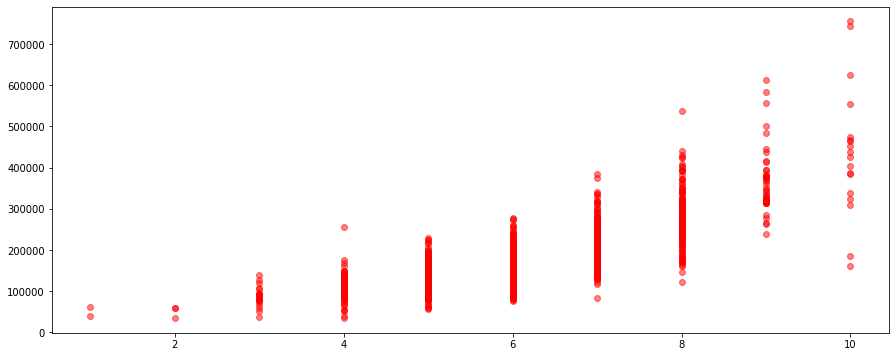

In [69]:
plt.figure(figsize=(15,6))
plt.scatter(x=train['OverallQual'], y=train['SalePrice'], color='red', alpha=0.5)
plt.show()
#이상치 없음 단일 숫자

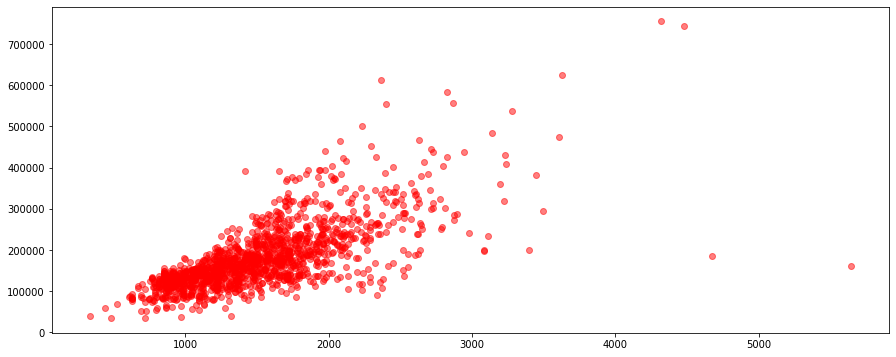

In [70]:
plt.figure(figsize=(15,6))
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'], color='red', alpha=0.5)
plt.show()
#이런 애들 파악해서 잘라 낼 예정

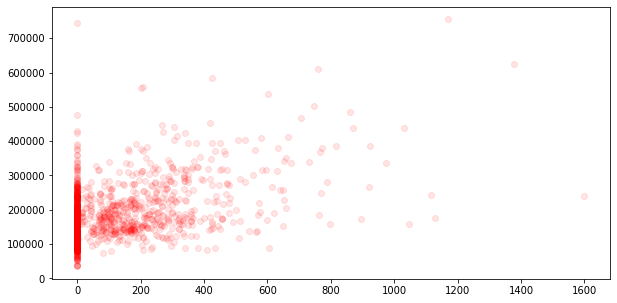

In [71]:
plt.figure(figsize=(10,5))
plt.scatter(x=train['MasVnrArea'], y=train['SalePrice'], color='red', alpha=0.1)
plt.show()
#1500 넘어 가는 애들 잘라줌

In [72]:
print(train.shape)

train = train[(train['GrLivArea']<4600)]

print(train.shape)

train = train[(train['MasVnrArea']<1500)]

print(train.shape)

train_y = train['SalePrice'].to_frame()

#미리 잘라내고 결과값 받아둠

(1460, 81)
(1458, 81)
(1449, 81)


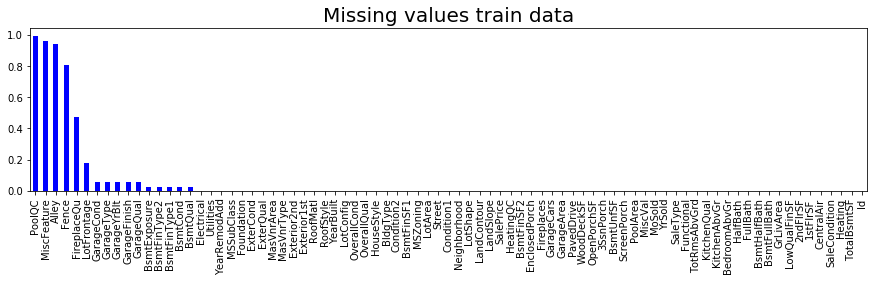

In [73]:
plt.subplots(1,0,figsize = (15,3))
train.isnull().mean().sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values train data', fontsize = 20)
plt.show()
#모자란 애들을 어떻게 채울것인가 고민

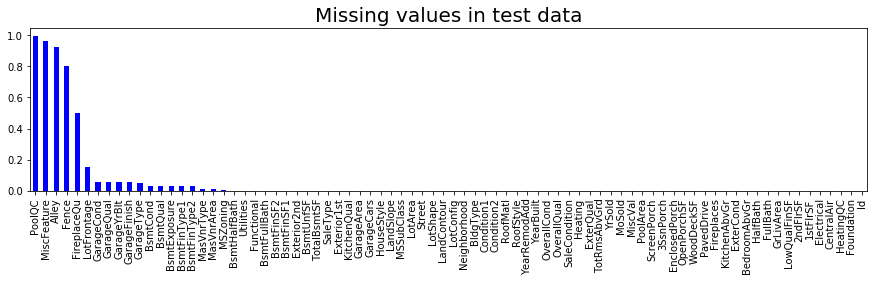

In [74]:
plt.subplots(1,0,figsize = (15,3))
test.isnull().mean().sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values in test data', fontsize = 20)
plt.show()

In [75]:
num_train = train.shape[0]
num_test = test.shape[0]


#합치기
td = pd.concat((train,test),sort=False).reset_index(drop=True)

td.drop(['SalePrice'],axis=1,inplace=True)#세일 값 잘라내고
td.drop(['Id'],axis=1,inplace=True)#아이디 잘라내고
print('total data : ',td.shape)

total data :  (2908, 79)


In [76]:
#빈칸 많은 애들 다 잘라냄 아까 상위에 있던 애들 전부 드롭 
td = td.dropna(thresh=len(td)*0.9,axis=1)

print(td.shape)
#6개 아까 많던거 잘라냄

(2908, 73)


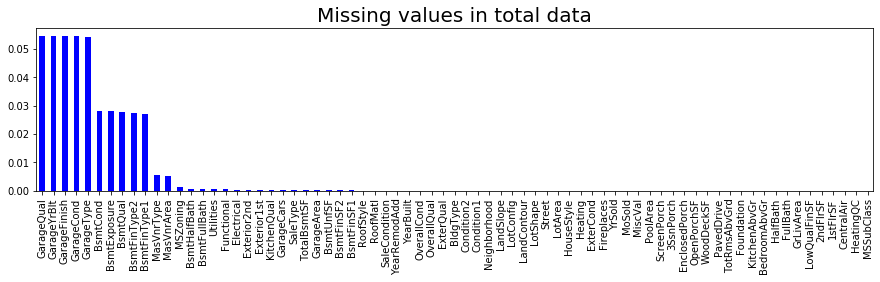

In [77]:
plt.subplots(1,0,figsize = (15,3))
td.isnull().mean().sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values in total data', fontsize = 20)
plt.show()
#효과가 없는 애들 자르고 남는 애들은 채워줌

In [78]:
NA=td[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt','BsmtFinType2','BsmtFinType1','BsmtCond', 'BsmtQual','BsmtExposure', 'MasVnrArea','MasVnrType','Electrical','MSZoning','BsmtFullBath','BsmtHalfBath','Utilities','Functional','Exterior1st','BsmtUnfSF','Exterior2nd','TotalBsmtSF','GarageArea','GarageCars','KitchenQual','BsmtFinSF2','BsmtFinSF1','SaleType']]
#전체 데이터 중에서
NAcatego = NA.select_dtypes(include='object')
NAnumber = NA.select_dtypes(exclude='object')

print(NAcatego.shape[1])
print(NAnumber.shape[1])
#빈칸 나눠서 개수 세보니까 이정도

18
10


In [0]:
td['MasVnrArea'] = td['MasVnrArea'].fillna(0)
#MasVnrArea = 석조 바닥을 의미함 석조바닥이 없으면 0 을 빈칸에 0 넣어도 무방 하므로 fillna 에 0
td['GarageYrBlt']=td["GarageYrBlt"].fillna(1980)
#앞전에 본것처럼 연도는 빈칸에 평균 연도 계산해서 넣자 

In [80]:
print(td['SaleType'].value_counts())
print(td['Exterior1st'].value_counts())

WD       2519
New       234
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64
VinylSd    1019
MetalSd     450
HdBoard     442
Wd Sdng     410
Plywood     221
CemntBd     123
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
CBlock        2
AsphShn       2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64


In [0]:
td['SaleType']=td['SaleType'].fillna(method='ffill')
td['Exterior1st']=td['Exterior1st'].fillna(method='ffill')
td['Exterior2nd']=td['Exterior2nd'].fillna(method='ffill')
td['KitchenQual']=td['KitchenQual'].fillna(method='ffill')
td['Electrical']=td['Electrical'].fillna(method='ffill')
td['Functional']=td['Functional'].fillna(method='ffill')
td['Utilities']=td['Utilities'].fillna(method='ffill')
td['MSZoning']=td['MSZoning'].fillna(method='ffill')
#foward fill 로 데이터 채우기 

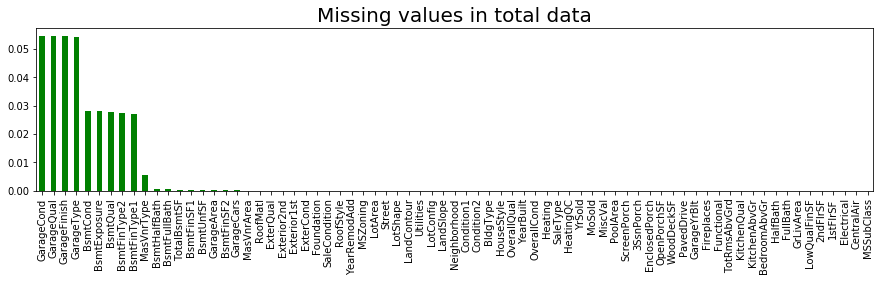

In [82]:
plt.subplots(1,0,figsize = (15,3))
td.isnull().mean().sort_values(ascending = False).plot.bar(color = 'green')
plt.title('Missing values in total data', fontsize = 20)
plt.show()

In [0]:
NAcols=td.columns
for col in NAcols:
    if td[col].dtype == "object":
        td[col] = td[col].fillna("Miss")
#범주형에는 miss를 넣고 

for col in NAcols:
    if td[col].dtype != "object":
        td[col]= td[col].fillna(0)
#빈칸에는 0 을 넣자

#차고연도 처럼 연속된 숫자인데 차고가 없을수 있음 해당 값은 0이 들어가야 맞고 
#풀 욕실의 유무와 같은 피쳐 들도 결국에는 없는것이므로 miss를 넣어서 빈칸을 채우는 것이 맞음 

In [84]:
td.isnull().sum().sort_values(ascending=False).head()
#모든 칸을 다 채움

SaleCondition    0
TotalBsmtSF      0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

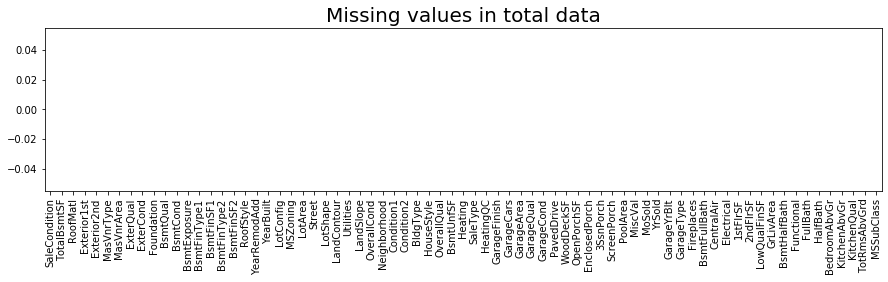

In [85]:
plt.subplots(1,0,figsize = (15,3))
td.isnull().mean().sort_values(ascending = False).plot.bar(color = 'green')
plt.title('Missing values in total data', fontsize = 20)
plt.show()

In [0]:
# 두개로 나눠진 피처는 하나로 합치는것이 좋음
#파생변수를 많이 만든다고 해서 좋은것이 아님 
#적절한 데이터를 선별해서 넣어두고 영향을 갖는것만 선별하는것이 옳음

td['TotalArea'] = td['TotalBsmtSF'] + td['1stFlrSF'] + td['2ndFlrSF'] + td['GrLivArea'] +td['GarageArea']

td['Bathrooms'] = td['FullBath'] + td['HalfBath']*0.5 

td['Year average']= (td['YearRemodAdd'] + td['YearBuilt'])/2

In [0]:
#실제로 범주형인 애들을 int에서 str으로 바꿈 
#월은 실제로 12월이 범주임 
td['MoSold'] = td['MoSold'].astype(str)
td['MSSubClass'] = td['MSSubClass'].apply(str)
td['YrSold'] = td['YrSold'].astype(str)

In [0]:
#왜도와 첨도가 분포에 미치는 영향 
#왜도:데이터가 대칭이 아닌정도 ->왜도 값이 데이터의 형상에 대한 정도를 나타냄 
#대칭에 가까울수록 왜도 값은 0에 가까움 정규분포에 가까울수록 왜도가 없음 
#좌우 대칭의 정도를 말하는 것임 

#첨도 : 분포의 꼬리가 정규 분포와 어떻게 다른지 나타냄 
#정규분포를 따르는 데이터가 첨도의 기준선을 설정함

#숫자로 된 데이터는 어떤성질을 가지고 있는가? 
#중심경향도:데이터가 어느 위치를 중심으로 분포되어 있는가?
#산포도 : 데이터가 중심점을 기준으로 얼마나 흩어져 있는가?
#비대칭도 : 데이터가 대칭상태를 기준으로 얼마나 치우쳐 있는가?
#평균->정보의 손실이 적은 민주적인 대표값->이상치에 크게 영향을 받음 
#중양값: 자료의 손실이 많은 가운데 값이외에는 순서에 대한 정보만 존재하고 큰 영향을 못 미침 대표성을 띄기 어려움

# 변동성 측정: 중심위치의 측정은 자료의 분포 즉 변수 값들이 평균을 ㅈ우심으로 얼마만큰 산포되어 있는지에 대해서는 알기 어려움

#일단 데이터가 정규 분포를 듸게 되면 표준편차를 활용할수 있다. 그 것은 결과적으로 자료의 특성을 파악하는데 사용되는데 
#종 모양을 갖게 되면 모든 변수중 65%가 표준편차*1 범위 내에 들어와 있다고 할수있음 
#어떤 관찰 값이 평균으로 부터 표준편차의 몇배만큼 떨어져있는가의 척도 



In [0]:
from scipy.stats import skew

numeric_feats = td.dtypes[td.dtypes != "object"].index

skewed_feats = td[numeric_feats].apply(lambda x: skew(x.dropna())) 
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

td[skewed_feats] = np.log1p(td[skewed_feats])

In [89]:
td_dm = pd.get_dummies(td)

print(td_dm.head())
print(td_dm.shape)

#더미화 시킴
#원래 76개에서 312개로 늘어남 이렇게 되면 뭐가 손해??
#차원의 저주 : 차원이 높아지면 그에 배례해서 데이터 용량도 많아져야함 
#그렇지 않으면 모델의 성능이 떨어지게 됨

    LotArea  OverallQual  ...  SaleCondition_Normal  SaleCondition_Partial
0  9.042040            7  ...                     1                      0
1  9.169623            6  ...                     1                      0
2  9.328212            7  ...                     1                      0
3  9.164401            7  ...                     0                      0
4  9.565284            8  ...                     1                      0

[5 rows x 311 columns]
(2908, 311)


In [90]:
#주요 변수의 왜도 값을 측정 
print('왜도 :',td_dm['GrLivArea'].skew())
print('첨도 :',td_dm['GrLivArea'].kurt())

왜도 : -0.01990589830841269
첨도 : 0.10624058915081269


In [91]:
Train = td_dm[:num_train]
Test = td_dm[num_train:] 

Train.shape[0]

1449

In [0]:
train_y = np.log1p(train_y)

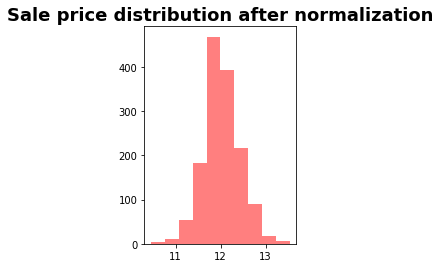

In [93]:
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(train_y['SalePrice'], bins=10, color='red',alpha=0.5)
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)
plt.show()

In [0]:
x=Train
y=np.array(train_y)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)

In [0]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform x_train
x_train = scaler.fit_transform(x_train)

# transform "x_test"
x_test = scaler.transform(x_test)

#Transform the test set
X_test= scaler.transform(Test)

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm


lreg=LinearRegression()
lin_reg = lreg.fit(x_train,y_train)
lin_pred = lin_reg.predict(x_test)
print('rmse test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, lin_pred))))

rmse test = 269093067.4219693


In [98]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=14 is: ",math.sqrt(-ridge_reg.best_score_))

The best value of Alpha is:  {'alpha': 14}
The best score achieved with Alpha=14 is:  0.11489508416304386


In [99]:
ridge_mod=Ridge(alpha=19)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print('rmse train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('rmse test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test)))) 

rmse train = 0.09762909687970438
rmse test = 0.1066239763600536


In [100]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}

lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print('The best value of Alpha : ',lasso_reg.best_params_)

The best value of Alpha :  {'alpha': 0.0009}


In [101]:
lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print('rmse train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('rmse test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))

rmse train = 0.10253157099393541
rmse test = 0.10478386905118377


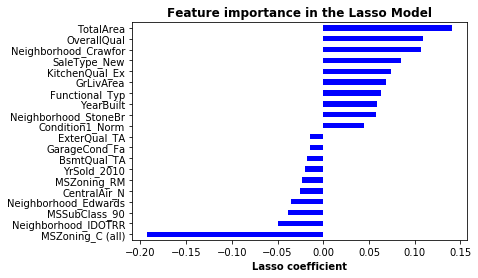

In [102]:
#feature importance를 찾아보고 겉절이들을 잘라보자

coefs = pd.Series(lasso_mod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='blue')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [103]:
print("Lasso 모델에는 ",sum(coefs != 0), "개만 취하고 나머지  ", sum(coefs == 0),"얘네는 상관이 없으니 그대로 털어냄")

Lasso 모델에는  89 개만 취하고 나머지   222 얘네는 상관이 없으니 그대로 털어냄


In [104]:
from sklearn.linear_model import ElasticNetCV

alphas = [10,1,0.1,0.01,0.001,0.002,0.003,0.004,0.005,0.00054255]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('rmse test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
print('엘라스틱 모델의 알파 값,ratio : ',elastic_cv.alpha_ ,elastic_cv.l1_ratio_)

rmse test = 0.1036700157293903
엘라스틱 모델의 알파 값,ratio :  0.00054255 1.0


In [105]:
'''from xgboost.sklearn import XGBRegressor
xg_reg = XGBRegressor(
        eval_metric = 'rmse',
        nthread = 4,
        eta = 0.1,
        num_boost_round = 80,
        max_depth = 5,
        subsample = 0.5,
        colsample_bytree = 1.0,
        silent = 1,
        )
parameters = {
        'num_boost_round': [10, 25, 50],
        'eta': [0.05, 0.1, 0.3],
        'max_depth': [3, 4, 5],
        'subsample': [0.9, 1.0],
        'colsample_bytree': [0.9, 1.0],
    }
xg_grid = GridSearchCV.GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xg_grid.fit(x_train,y_train)
print(xg_grid.best_estimator_)
print(xg_grid.best_score_)'''
#이렇게 돌렸는데 하루종일 안나와서 랜덤서치

"from xgboost.sklearn import XGBRegressor\nxg_reg = XGBRegressor(\n        eval_metric = 'rmse',\n        nthread = 4,\n        eta = 0.1,\n        num_boost_round = 80,\n        max_depth = 5,\n        subsample = 0.5,\n        colsample_bytree = 1.0,\n        silent = 1,\n        )\nparameters = {\n        'num_boost_round': [10, 25, 50],\n        'eta': [0.05, 0.1, 0.3],\n        'max_depth': [3, 4, 5],\n        'subsample': [0.9, 1.0],\n        'colsample_bytree': [0.9, 1.0],\n    }\nxg_grid = GridSearchCV.GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)\nxg_grid.fit(x_train,y_train)\nprint(xg_grid.best_estimator_)\nprint(xg_grid.best_score_)"

In [0]:
from xgboost.sklearn import XGBRegressor
xg_reg = XGBRegressor(
        eval_metric = 'rmse',
        nthread = 4,
        eta = 0.1,
        num_boost_round = 80,
        max_depth = 5,
        subsample = 0.5,
        colsample_bytree = 1.0,
        silent = 1,
        )
parameters = {
        'num_boost_round': [10, 25, 50],
        'eta': [0.05, 0.1, 0.3],
        'max_depth': [3, 4, 5],
        'subsample': [0.9, 1.0],
        'colsample_bytree': [0.9, 1.0],
    }
rnd_search = RandomizedSearchCV(xg_reg ,param_distributions=parameters,n_iter=50,cv=2,verbose=2,n_jobs=4,random_state=42)
rnd_search.fit(x_train,y_train)
print(rnd_search.best_estimator_)
print(rnd_search.best_score_)                            

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   16.5s


In [0]:
from xgboost.sklearn import XGBRegressor
#그리드 서치로 돌린거

xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, eta=0.1,
             eval_metric='rmse', gamma=0, importance_type='gain',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=0, missing=None, n_estimators=2000, n_jobs=1,
             nthread=4, num_boost_round=80, objective='reg:linear',
             random_state=0, reg_alpha=0.001, reg_lambda=0.01,
             scale_pos_weight=1, seed=None, silent=1, subsample=0.5,
             verbosity=1)
xgmod=xgb.fit(x_train,y_train)
xg_pred=xgmod.predict(x_test)
print('rmse test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, xg_pred))))

In [0]:
from xgboost.sklearn import XGBRegressor
#랜덤서치로 돌린거

xgb_rnd= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, eta=0.3,
             eval_metric='rmse', gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
             nthread=4, num_boost_round=25, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=1, subsample=1.0, verbosity=1)
xgmod2=xgb_rnd.fit(x_train,y_train)
xg_pred2=xgmod2.predict(x_test)
print('rmse test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, xg_pred2))))

In [0]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv), 
                            ('XGBRegressor', xgb)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print('rmse test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, vote_pred))))

In [0]:
'''Stacking
Stacking procedure는 다음과 같이 2 단계로 진행된다.

Level 0 : training dataset을 이용하여 sub-model 예측 결과를 생성한다.
Level 1 : level 0의 output 결과가 level 1의 input 값이 된다. level 0의 output을 training data로 사용하여 meta learner 모델을 생성한다.
이러한 2 단계 과정을 거치며 stacked generalization(meata learner)은 level 0에서 사용한 training data와 다른 dataset을 사용하기 때문에 overfitting을 방지하고 bias를 줄이게 된다.

Stacked generalization 과정에서 level 0 모델들은 되도록 다양한 예측 결과를 meta learner에서 input 값으로 활용할 수 있도록 각기 다른 알고리즘을 사용하는 것이 좋다.'''

from mlxtend.regressor import StackingRegressor



stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod, vote_mod], 
                           meta_regressor=xgb, use_features_in_secondary=True
                          )

stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, stacking_pred))))

In [0]:
final_test=(0.2*vote_pred+0.2*stacking_pred+ 0.6*y_lasso_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, final_test))))

In [0]:
#VotingRegressor to predict the final Test
vote_test = vote_mod.predict(X_test)
final1=np.expm1(vote_test)

#StackingRegressor to predict the final Test
stack_test = stregr.predict(X_test)
final2=np.expm1(stack_test)

#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(X_test)
final3=np.expm1(lasso_test)

In [0]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
final=(0.2*final1+0.2*final2+0.6*final3)

final_submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": final
    })

name = 'new_sub_ver9.csv'

final_submission.to_csv(name, index=False)
final_submission.head()
files.download(name)

In [0]:
#제출결과 0.11516  488등

In [0]:
results={}
results["Ridge"]=math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))
results["Lasso"]=math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))
results["elastic"]=math.sqrt(sklm.mean_squared_error(y_test, ela_pred))

results["XBG_reg"]=math.sqrt(sklm.mean_squared_error(y_test, xg_pred))

results["voting"]=math.sqrt(sklm.mean_squared_error(y_test, vote_pred))
results["stacking"]=math.sqrt(sklm.mean_squared_error(y_test, stacking_pred))
results['모델별로 가중치'] = math.sqrt(sklm.mean_squared_error(y_test, final_test))


results = pd.DataFrame.from_dict(results,orient='index')
results.columns=["RMSE Score"] 
results.plot(kind="bar",title="Model Scores")
axes = plt.gca()
axes.set_ylim([0,0.15])

results

In [0]:
pca = PCA(whiten=True)
pca.fit(td_dm)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

#Lasso모델에서는 알아서 importance 정리해서 없애줌 
#이거 넣고 돌려도 별로임

In [0]:
!git clone https://github.com/cjstntjd/machine.git